Air video

frame # 320

In [1]:
import numpy as np
import cv2


vidcap = cv2.VideoCapture('air/air.mp4')
success,image = vidcap.read()
count = 0
while success:
  cv2.imwrite("air/frame%d.jpg" % count, image)     # save frame as JPEG file      
  success,image = vidcap.read()
  print('Read a new frame: ', count )
  count += 1

In [2]:
import matplotlib.pyplot as plt
import numpy as np

Water video

vidcap = cv2.VideoCapture('water/water.mp4')
success,image = vidcap.read()
count = 0
while success:
  cv2.imwrite("water/frame%d.jpg" % count, image)     # save frame as JPEG file      
  success,image = vidcap.read()
  print('Read a new frame: ', count )
  count += 1

Steady interface, salt:


vidcap = cv2.VideoCapture('steady_after/steady_after.mp4')
success,image = vidcap.read()
count = 0
while success:
  cv2.imwrite("steady_after/frame%d.jpg" % count, image)     # save frame as JPEG file      
  success,image = vidcap.read()
  print('Read a new frame: ', count )
  count += 1

vidcap = cv2.VideoCapture('wave/wave.mp4')
success,image = vidcap.read()
count = 0
while success:
  cv2.imwrite("wave/frame%d.jpg" % count, image)     # save frame as JPEG file      
  success,image = vidcap.read()
  print('Read a new frame: ', count )
  count += 1

Cutting out the relevant part

In [3]:
import cv2
#air = cv2.flip(cv2.imread("air/frame500.jpg", cv2.IMREAD_GRAYSCALE), -1)
water = cv2.flip(cv2.imread("water/frame500.jpg", cv2.IMREAD_GRAYSCALE), -1)
img = cv2.flip(cv2.imread("wave/frame500.jpg", cv2.IMREAD_GRAYSCALE), -1)

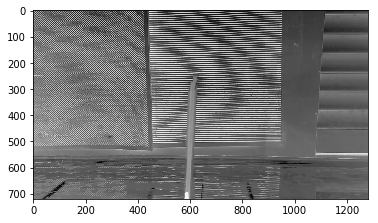

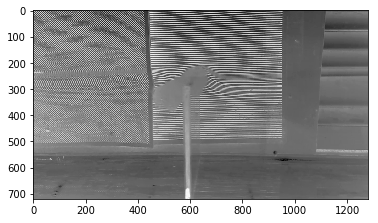

In [4]:
plt.imshow(water, cmap='Greys')
plt.show()
plt.imshow(img, cmap='Greys')

In [5]:
#img = cv2.flip(cv2.imread("wave/frame300.jpg", cv2.IMREAD_GRAYSCALE), -1)
#plt.imshow(img, cmap = 'Greys')
imgcut = img[0:500, 500:600]
refcut = water[0:500, 500:600]


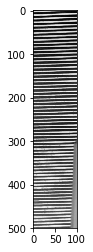

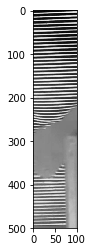

In [10]:
plt.imshow(refcut, cmap = 'Greys')
plt.show()
plt.imshow(imgcut, cmap = 'Greys')


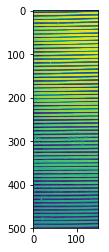

In [41]:
ref = water[200:700, 650:800]

plt.imshow(ref)

400:600 és 1000:1200

In [14]:
def write_frames(num):
    air = cv2.flip(cv2.imread("air/frame%s.jpg" %num, cv2.IMREAD_GRAYSCALE), -1)
    water = cv2.flip(cv2.imread("water/frame%s.jpg" %num, cv2.IMREAD_GRAYSCALE), -1)
    img = cv2.flip(cv2.imread("salt/frame%s.jpg" %num, cv2.IMREAD_GRAYSCALE), -1)
    cv2.imwrite("air.tif", air)     # save frame as JPEG file      
    cv2.imwrite("water.tif", water)
    cv2.imwrite("salt.tif", img)     # save frame as JPEG file      


In [93]:
img = cv2.flip(cv2.imread("wave/frame5760.jpg", cv2.IMREAD_GRAYSCALE), -1)
cv2.imwrite("wave.tif", img)     # save frame as JPEG file      


True

In [15]:
write_frames(400)

## Line counting

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
refref = refcut[:, 50]
imgref = imgcut[:, 50]

peaksimg, _ = find_peaks(255.-imgref, height=125)
peaks, _ = find_peaks(255.-refref, height=125)

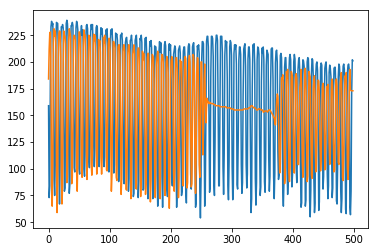

In [7]:
plt.plot(refref)
plt.plot(imgref)

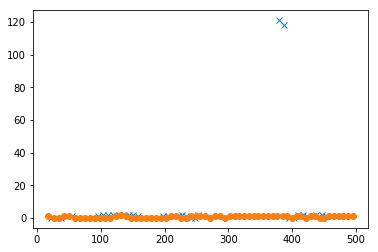

In [13]:
plt.plot(peaksimg[2:], np.abs(np.diff(np.diff(peaksimg))), "x")
plt.plot(peaks[2:], np.abs(np.diff(np.diff(peaks))), "o")

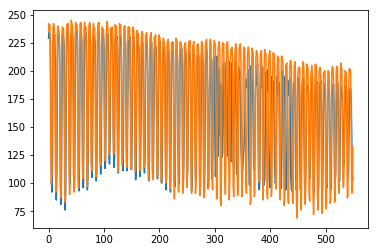

In [67]:
plt.plot(imgref)
plt.plot(refref)

In [55]:
def printMaxAmpl(img, ref, col):
    img = img[50:600, 600:800]
    #ref = ref[180:550, 600:700]
    
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    img = clahe.apply(img)
    imgref = img[:,col]
    refref = refcut[:,col]
    peaksimg, _ = find_peaks(255.-imgref, height=125)
    peaks, _ = find_peaks(255.-refref, height=125)
    shorter =  np.min([len(peaksimg), len(peaks)])
    peaksimgcut = peaksimg[:shorter]
    peakscut = peaks[:shorter]
    maxplace = np.argmax(np.abs(np.diff(np.diff(peaksimgcut)) - np.diff(np.diff(peakscut))))
    return [maxplace, np.max(np.abs(np.diff(np.diff(peaksimgcut)) - np.diff(np.diff(peakscut))))]

In [11]:

import openpiv.validation
import openpiv.filters
import openpiv.scaling
import scipy
import openpiv.tools
import openpiv.process
import openpiv.scaling

In [9]:

def printMaxAmpl(img, ref, col):
    img = img[0:500, 500:600]
    #ref = ref[180:550, 600:700]
    
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    img = clahe.apply(img)
    imgref = img[:,col]
    refref = ref[:,col]
    peaksimg, _ = find_peaks(255.-imgref, height=125)
    peaks, _ = find_peaks(255.-refref, height=125)
    shorter =  np.min([len(peaksimg), len(peaks)])
    peaksimgcut = peaksimg[:shorter]
    peakscut = peaks[:shorter]
    maxplace = np.argmax(np.abs(np.diff(np.diff(peaksimgcut)) - np.diff(np.diff(peakscut))))
    return [maxplace, np.max(np.abs(np.diff(np.diff(peaksimgcut)) - np.diff(np.diff(peakscut))))]

In [10]:
def read_file(src):
    img = cv2.flip(cv2.imread(src, cv2.IMREAD_GRAYSCALE), -1)
    return img

C:\Users\balin\Anaconda3\lib\site-packages\scipy\fftpack\basic.py:153: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  x = x[index]


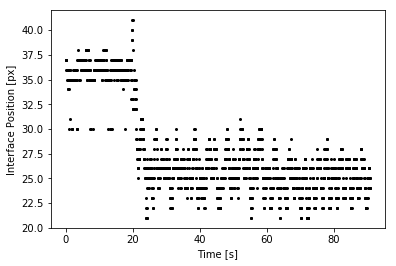

In [48]:
plt.plot(np.arange(0., 2000., 1)/22., ampls, 'o', c='black', markersize=2.)
#plt.xlim(180, 240)
#plt.ylim(20, 60)
plt.xlabel('Time [s]')
plt.ylabel('Interface Position [px]')
from scipy.signal import hilbert, chirp
analytic_signal = hilbert(ampls[:300]-np.average(ampls[:300]), N=10)
#plt.savefig('Interface_position_.png', bbox_inches='tight')

Filtering by FFT

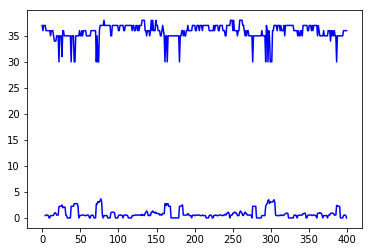

In [50]:
import pandas as pd
import numpy as np
ts = pd.Series(ampls[:400])
ts.rolling(window=5).std().plot(style='b')
ts.plot(style='b')

In [52]:
dt=1./22.
t = np.linspace(0., 2000*dt, 20000)
f = np.linspace(0., 44., 2000//2)

In [53]:
from scipy.fftpack import fft, irfft, ifft

In [60]:
ampls=np.array(ampls)
asd = fft(ampls-np.average(ampls))

(0.0, 2.0)

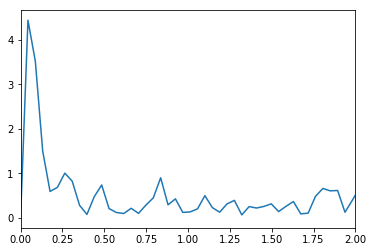

In [62]:
plt.plot(f, 2.0/2000 * np.abs(asd[0:2000//2]))
plt.xlim(0., 2.)

In [64]:
2.*np.pi/0.66

9.519977738150887

In [65]:
2*np.pi/60.

0.10471975511965977

Setting really low frequency components to 0

In [65]:
asd[asd < 1.] = 0.

(0.0, 2000)

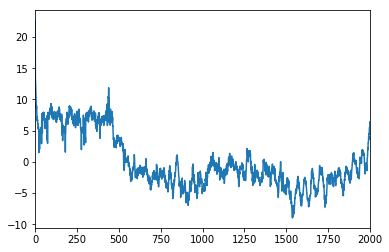

In [67]:
plt.plot(np.real(ifft(asd)))

plt.xlim(0., 2000)

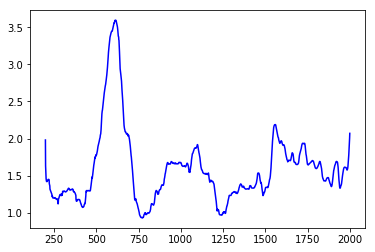

In [75]:
filtered = np.real(ifft(asd))
#filtered[0:250].std()
ts = pd.Series(filtered)
ts.rolling(window=200).std().plot(style='b')
#ts.plot(style='b')

#### Amplitúdó mérésére: sliding standard deviation. 

7 seces ablakban rolling std:

(0.0, 50)

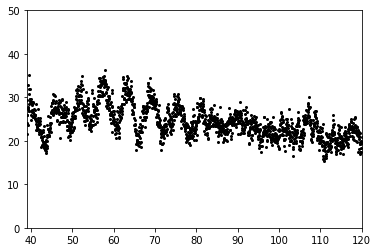

In [88]:
plt.plot(np.arange(0., 8600., 1)/22., filtered, 'o', c='black', markersize=2.)
plt.xlim(39., 120)
plt.ylim(0., 50)

In [80]:
W = 10*22 # Window size
a = np.array(filtered)
nrows = a.size - W + 1
n = a.strides[0]
a2D = np.lib.stride_tricks.as_strided(a,shape=(nrows,W),strides=(n,n))
out = np.std(a2D, axis=1)

(0.0, 39.0)

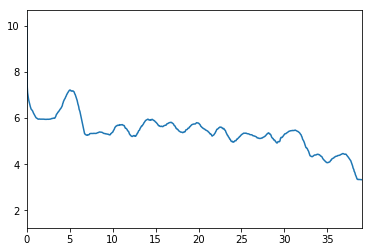

In [85]:
plt.plot(np.arange(0., out.size, 1)/22., out)
plt.xlim(0., 39.)

### 12 V:
20s:30s


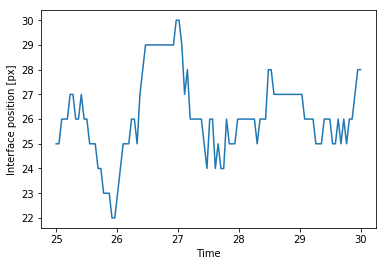

Max Amplitude at 0.6  ampl:  1.5804535549877436


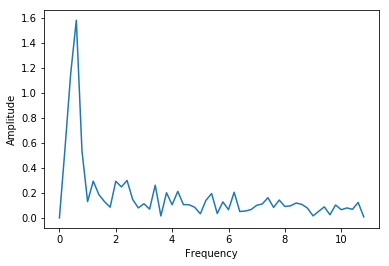

In [11]:
imin = 25*22
imax =30*22
t1 = imax /22
t0 = imin/22
n_samples = imax-imin
ampls = []
for i in range(imin, imax):
    #print(i)
    img = read_file("wave/frame%s.jpg" %i)
    amplsincol = []
    #for j in range(100):
    #    amplsincol.append(printMaxAmpl(img, ref,j)[1])
        #print(printMaxAmpl(img, ref,j)[1])
    #m = np.argmax(np.array(amplsincol))
    ampls.append(printMaxAmpl(img, refcut,50)[0])
ampls = np.array(ampls)
plt.plot(np.linspace(t0, t1, ampls.shape[0]), ampls)
plt.xlabel('Time')
plt.ylabel('Interface position [px]')
plt.show()

np_fft = np.fft.fft(ampls-np.average(ampls))
amplitudes = 2/n_samples * np.abs(np_fft) 
frequencies = np.fft.fftfreq(n_samples) * n_samples * 1/(t1-t0)
print("Max Amplitude at", frequencies[:len(frequencies)//2][np.argmax(amplitudes)], " ampl: ", np.max(amplitudes))

plt.plot(frequencies[:len(frequencies)//2], amplitudes[:len(np_fft)//2])
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()


## 11V


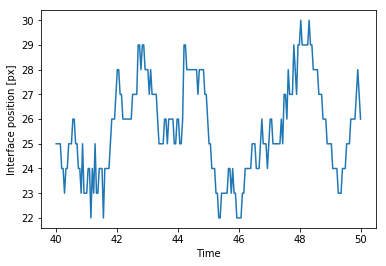

Max Amplitude at 0.2  ampl:  1.832176677717129


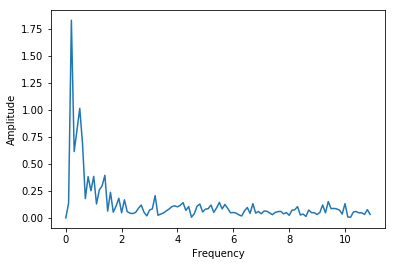

In [12]:
imin = 40*22
imax =50*22
t1 = imax /22
t0 = imin/22
n_samples = imax-imin
ampls = []
for i in range(imin, imax):
    #print(i)
    img = read_file("wave/frame%s.jpg" %i)
    amplsincol = []
    #for j in range(100):
    #    amplsincol.append(printMaxAmpl(img, ref,j)[1])
        #print(printMaxAmpl(img, ref,j)[1])
    #m = np.argmax(np.array(amplsincol))
    ampls.append(printMaxAmpl(img, refcut,50)[0])
ampls = np.array(ampls)
plt.plot(np.linspace(t0, t1, ampls.shape[0]), ampls)
plt.xlabel('Time')
plt.ylabel('Interface position [px]')
plt.show()

np_fft = np.fft.fft(ampls-np.average(ampls))
amplitudes = 2/n_samples * np.abs(np_fft) 
frequencies = np.fft.fftfreq(n_samples) * n_samples * 1/(t1-t0)
print("Max Amplitude at", frequencies[:len(frequencies)//2][np.argmax(amplitudes)], " ampl: ", np.max(amplitudes))

plt.plot(frequencies[:len(frequencies)//2], amplitudes[:len(np_fft)//2])
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

## 10V

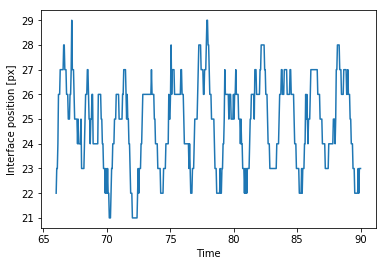

Max Amplitude at 0.4583333333333334  ampl:  2.0341967161493124


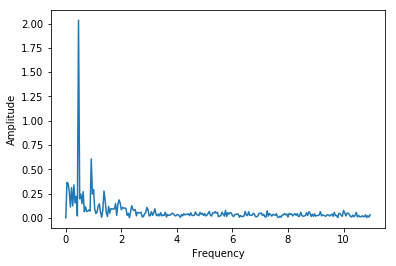

In [13]:
imin = 66*22
imax =90*22
t1 = imax /22
t0 = imin/22
n_samples = imax-imin
ampls = []
for i in range(imin, imax):
    #print(i)
    img = read_file("wave/frame%s.jpg" %i)
    amplsincol = []
    #for j in range(100):
    #    amplsincol.append(printMaxAmpl(img, ref,j)[1])
        #print(printMaxAmpl(img, ref,j)[1])
    #m = np.argmax(np.array(amplsincol))
    ampls.append(printMaxAmpl(img, refcut,50)[0])
ampls = np.array(ampls)
plt.plot(np.linspace(t0, t1, ampls.shape[0]), ampls)
plt.xlabel('Time')
plt.ylabel('Interface position [px]')
plt.show()
np_fft = np.fft.fft(ampls-np.average(ampls))
amplitudes = 2/n_samples * np.abs(np_fft) 
frequencies = np.fft.fftfreq(n_samples) * n_samples * 1/(t1-t0)
print("Max Amplitude at", frequencies[:len(frequencies)//2][np.argmax(amplitudes)], " ampl: ", np.max(amplitudes))

plt.plot(frequencies[:len(frequencies)//2], amplitudes[:len(np_fft)//2])

plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

## 9 V


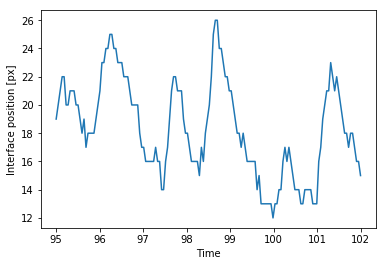

Max Amplitude at 0.14285714285714285  ampl:  2.289972110295633


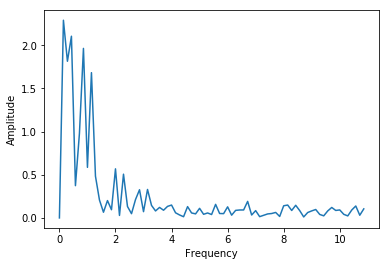

In [14]:
imin = 95*22
imax =102*22
t1 = imax /22
t0 = imin/22
n_samples = imax-imin
ampls = []
for i in range(imin, imax):
    #print(i)
    img = read_file("wave/frame%s.jpg" %i)
    amplsincol = []
    #for j in range(100):
    #    amplsincol.append(printMaxAmpl(img, ref,j)[1])
        #print(printMaxAmpl(img, ref,j)[1])
    #m = np.argmax(np.array(amplsincol))
    ampls.append(printMaxAmpl(img, refcut,50)[0])
ampls = np.array(ampls)
plt.plot(np.linspace(t0, t1, ampls.shape[0]), ampls)
plt.xlabel('Time')
plt.ylabel('Interface position [px]')
plt.show()
np_fft = np.fft.fft(ampls-np.average(ampls))
amplitudes = 2/n_samples * np.abs(np_fft) 
frequencies = np.fft.fftfreq(n_samples) * n_samples * 1/(t1-t0)
print("Max Amplitude at", frequencies[:len(frequencies)//2][np.argmax(amplitudes)], " ampl: ", np.max(amplitudes))

plt.plot(frequencies[:len(frequencies)//2], amplitudes[:len(np_fft)//2])

plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

## 8 V

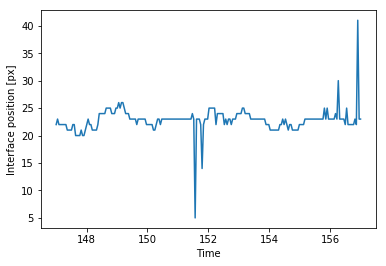

Max Amplitude at 0.3  ampl:  1.1337215098812226


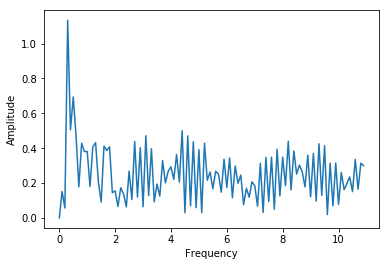

In [15]:
imin = 147*22
imax =157*22
t1 = imax /22
t0 = imin/22
n_samples = imax-imin
ampls = []
for i in range(imin, imax):
    #print(i)
    img = read_file("wave/frame%s.jpg" %i)
    amplsincol = []
    #for j in range(100):
    #    amplsincol.append(printMaxAmpl(img, ref,j)[1])
        #print(printMaxAmpl(img, ref,j)[1])
    #m = np.argmax(np.array(amplsincol))
    ampls.append(printMaxAmpl(img, refcut,50)[0])
ampls = np.array(ampls)
plt.plot(np.linspace(t0, t1, ampls.shape[0]), ampls)
plt.xlabel('Time')
plt.ylabel('Interface position [px]')
plt.show()

np_fft = np.fft.fft(ampls-np.average(ampls))
amplitudes = 2/n_samples * np.abs(np_fft) 
frequencies = np.fft.fftfreq(n_samples) * n_samples * 1/(t1-t0)
print("Max Amplitude at", frequencies[:len(frequencies)//2][np.argmax(amplitudes)], " ampl: ", np.max(amplitudes))

plt.plot(frequencies[:len(frequencies)//2], amplitudes[:len(np_fft)//2])

plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

## 7 V


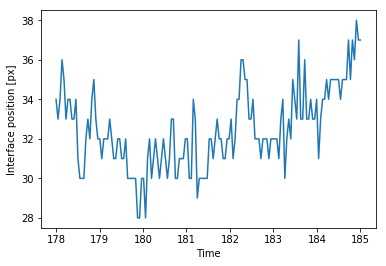

Max Amplitude at 0.14285714285714285  ampl:  1.844871920957744


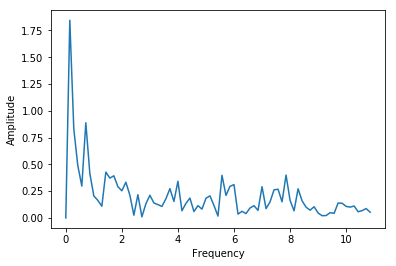

In [16]:
imin = 178*22
imax =185*22
t1 = imax /22
t0 = imin/22
n_samples = imax-imin
ampls = []
for i in range(imin, imax):
    #print(i)
    img = read_file("wave/frame%s.jpg" %i)
    amplsincol = []
    #for j in range(100):
    #    amplsincol.append(printMaxAmpl(img, ref,j)[1])
        #print(printMaxAmpl(img, ref,j)[1])
    #m = np.argmax(np.array(amplsincol))
    ampls.append(printMaxAmpl(img, refcut,50)[0])
ampls = np.array(ampls)
plt.plot(np.linspace(t0, t1, ampls.shape[0]), ampls)
plt.xlabel('Time')
plt.ylabel('Interface position [px]')
plt.show()

np_fft = np.fft.fft(ampls-np.average(ampls))
amplitudes = 2/n_samples * np.abs(np_fft) 
frequencies = np.fft.fftfreq(n_samples) * n_samples * 1/(t1-t0)
print("Max Amplitude at", frequencies[:len(frequencies)//2][np.argmax(amplitudes)], " ampl: ", np.max(amplitudes))

plt.plot(frequencies[:len(frequencies)//2], amplitudes[:len(np_fft)//2])

plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

## 6 V


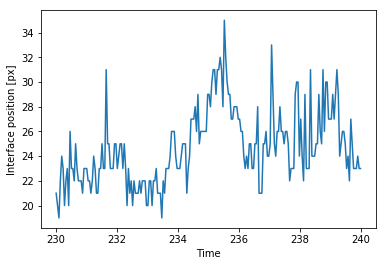

Max Amplitude at 0.1  ampl:  2.263369173225635


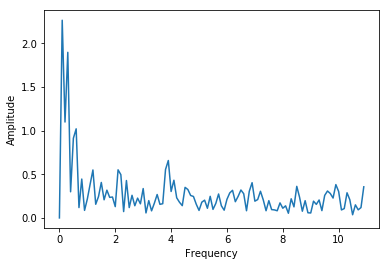

In [17]:
imin = 230*22
imax = 240*22
t1 = imax /22
t0 = imin/22
n_samples = imax-imin
ampls = []
for i in range(imin, imax):
    #print(i)
    img = read_file("wave/frame%s.jpg" %i)
    amplsincol = []
    #for j in range(100):
    #    amplsincol.append(printMaxAmpl(img, ref,j)[1])
        #print(printMaxAmpl(img, ref,j)[1])
    #m = np.argmax(np.array(amplsincol))
    ampls.append(printMaxAmpl(img, refcut,50)[0])
ampls = np.array(ampls)
plt.plot(np.linspace(t0, t1, ampls.shape[0]), ampls)
plt.xlabel('Time')
plt.ylabel('Interface position [px]')
plt.show()

np_fft = np.fft.fft(ampls-np.average(ampls))
amplitudes = 2/n_samples * np.abs(np_fft) 
frequencies = np.fft.fftfreq(n_samples) * n_samples * 1/(t1-t0)
print("Max Amplitude at", frequencies[:len(frequencies)//2][np.argmax(amplitudes)], " ampl: ", np.max(amplitudes))

plt.plot(frequencies[:len(frequencies)//2], amplitudes[:len(np_fft)//2])

plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

## 5 V

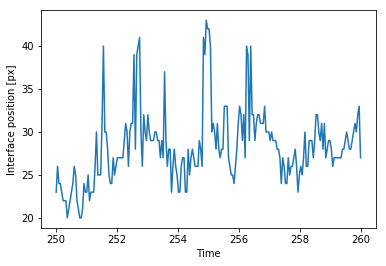

Max Amplitude at 0.3  ampl:  2.5036449203350264


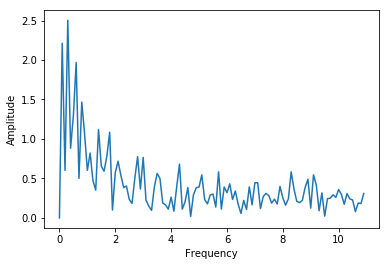

In [18]:
imin = 250*22
imax = 260*22
t1 = imax /22
t0 = imin/22
n_samples = imax-imin
ampls = []
for i in range(imin, imax):
    #print(i)
    img = read_file("wave/frame%s.jpg" %i)
    amplsincol = []
    #for j in range(100):
    #    amplsincol.append(printMaxAmpl(img, ref,j)[1])
        #print(printMaxAmpl(img, ref,j)[1])
    #m = np.argmax(np.array(amplsincol))
    ampls.append(printMaxAmpl(img, refcut,50)[0])
ampls = np.array(ampls)
plt.plot(np.linspace(t0, t1, ampls.shape[0]), ampls)
plt.xlabel('Time')
plt.ylabel('Interface position [px]')
plt.show()

np_fft = np.fft.fft(ampls-np.average(ampls))
amplitudes = 2/n_samples * np.abs(np_fft) 
frequencies = np.fft.fftfreq(n_samples) * n_samples * 1/(t1-t0)
print("Max Amplitude at", frequencies[:len(frequencies)//2][np.argmax(amplitudes)], " ampl: ", np.max(amplitudes))

plt.plot(frequencies[:len(frequencies)//2], amplitudes[:len(np_fft)//2])

plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

## 4V


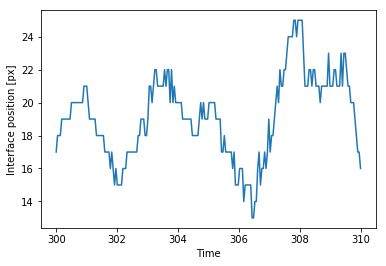

Max Amplitude at 0.2  ampl:  2.282411586951708


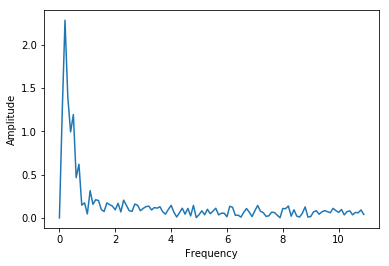

In [19]:
imin = 300*22
imax = 310*22
t1 = imax /22
t0 = imin/22
n_samples = imax-imin
ampls = []
for i in range(imin, imax):
    #print(i)
    img = read_file("wave/frame%s.jpg" %i)
    amplsincol = []
    #for j in range(100):
    #    amplsincol.append(printMaxAmpl(img, ref,j)[1])
        #print(printMaxAmpl(img, ref,j)[1])
    #m = np.argmax(np.array(amplsincol))
    ampls.append(printMaxAmpl(img, refcut,50)[0])
ampls = np.array(ampls)
plt.plot(np.linspace(t0, t1, ampls.shape[0]), ampls)
plt.xlabel('Time')
plt.ylabel('Interface position [px]')
plt.show()

np_fft = np.fft.fft(ampls-np.average(ampls))
amplitudes = 2/n_samples * np.abs(np_fft) 
frequencies = np.fft.fftfreq(n_samples) * n_samples * 1/(t1-t0)
print("Max Amplitude at", frequencies[:len(frequencies)//2][np.argmax(amplitudes)], " ampl: ", np.max(amplitudes))

plt.plot(frequencies[:len(frequencies)//2], amplitudes[:len(np_fft)//2])

plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

## 3V

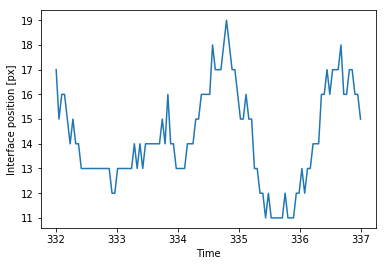

Max Amplitude at 0.4  ampl:  2.0810017592062717


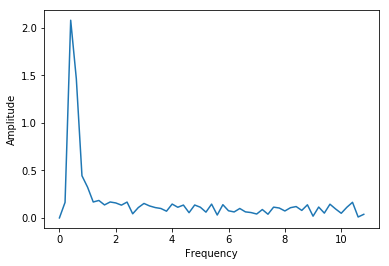

In [20]:
imin = 332*22
imax = 337*22
t1 = imax /22
t0 = imin/22
n_samples = imax-imin
ampls = []
for i in range(imin, imax):
    #print(i)
    img = read_file("wave/frame%s.jpg" %i)
    amplsincol = []
    #for j in range(100):
    #    amplsincol.append(printMaxAmpl(img, ref,j)[1])
        #print(printMaxAmpl(img, ref,j)[1])
    #m = np.argmax(np.array(amplsincol))
    ampls.append(printMaxAmpl(img, refcut,50)[0])
ampls = np.array(ampls)
plt.plot(np.linspace(t0, t1, ampls.shape[0]), ampls)
plt.xlabel('Time')
plt.ylabel('Interface position [px]')
plt.show()

np_fft = np.fft.fft(ampls-np.average(ampls))
amplitudes = 2/n_samples * np.abs(np_fft) 
frequencies = np.fft.fftfreq(n_samples) * n_samples * 1/(t1-t0)
print("Max Amplitude at", frequencies[:len(frequencies)//2][np.argmax(amplitudes)], " ampl: ", np.max(amplitudes))

plt.plot(frequencies[:len(frequencies)//2], amplitudes[:len(np_fft)//2])

plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

 #### Decreasing frequency:

Text(0,0.5,'Amplitude')

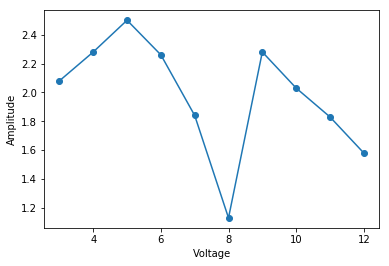

In [152]:
v = [12, 11, 10, 9, 8, 7, 6, 5, 4, 3]
ampl = [1.58, 1.83, 2.03, 2.28, 1.13, 1.84, 2.26, 2.5, 2.28, 2.08]
plt.plot(v, ampl, '-o')
plt.xlabel('Voltage')
plt.ylabel('Amplitude')